<a href="https://colab.research.google.com/github/lwallac2/Bank-Marketing/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## QUESTION 1



In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

#Reading in the data as adult dataframe
df = pd.read_csv("https://raw.githubusercontent.com/lwallac2/Bank-Marketing/main/bank-additional.csv", sep=';')

#Verifying that we can see the data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [19]:
housing_num=df.housing
df['housing_num'] = housing_num
df['housing_num']= df['housing_num'].astype('category')
df['housing_num']= df['housing_num'].cat.codes
df.dtypes[['housing','housing_num']]

housing        object
housing_num      int8
dtype: object

In [20]:
df[['housing','housing_num']]

,housing,housing_num
0,yes,2
1,no,1
2,yes,2
3,NA,0
4,yes,2
...,...,...
4114,yes,2
4115,yes,2
4116,no,1
4117,no,1


In [24]:
loan_num=df.loan
df['loan_num'] = loan_num
df['loan_num']= df['loan_num'].astype('category')
df['loan_num']= df['loan_num'].cat.codes
df.dtypes[['loan','loan_num']]

loan        object
loan_num      int8
dtype: object

In [25]:
df[['loan','loan_num']]

,loan,loan_num
0,no,0
1,no,0
2,no,0
3,unknown,1
4,no,0
...,...,...
4114,yes,2
4115,no,0
4116,no,0
4117,no,0


In [26]:
default_num=df.default
df['default_num'] = default_num
df['default_num']= df['default_num'].astype('category')
df['default_num']= df['default_num'].cat.codes
df.dtypes[['default','default_num']]

default        object
default_num      int8
dtype: object

In [27]:
df[['default','default_num']]

,default,default_num
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0
...,...,...
4114,no,0
4115,no,0
4116,no,0
4117,no,0


This 3 variables that I chose to recode are variables with Yes/No or unknown values. This recode is useful as not the data is closer to all int values instead of str or bool, which makes it easier to use for future calculations. It also is just an easy fix, the no's are not categorized as 0's and Yes are 2's, while unknown's are currently 1's but may decide to drop them later in the futre.  

## QUESTION 2

In [28]:
df.loan.replace('unknown','NA', inplace=True)


df[df['loan'] == 'NA']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,loan_num,default_num
3,38,services,married,basic.9y,no,unknown,NA,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,1,0
41,38,blue-collar,married,basic.9y,unknown,unknown,NA,telephone,jun,fri,430,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no,1,1
87,47,services,single,basic.9y,no,unknown,NA,telephone,jun,thu,835,3,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,yes,1,0
173,41,services,single,high.school,unknown,unknown,NA,cellular,may,mon,772,2,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no,1,1
375,31,technician,single,professional.course,no,unknown,NA,cellular,aug,mon,202,7,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023,33,blue-collar,married,basic.9y,no,unknown,NA,telephone,may,wed,141,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no,1,0
4030,37,technician,divorced,professional.course,no,unknown,NA,cellular,aug,tue,417,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,1,0
4042,40,blue-collar,single,basic.9y,no,unknown,NA,cellular,nov,wed,245,4,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no,1,0
4058,47,blue-collar,married,basic.4y,no,unknown,NA,telephone,jul,thu,175,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no,1,0


In [29]:
df.housing.replace('unknown','NA', inplace=True)


df[df['housing'] == 'NA']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,loan_num,default_num
3,38,services,married,basic.9y,no,NA,NA,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,1,0
41,38,blue-collar,married,basic.9y,unknown,NA,NA,telephone,jun,fri,430,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no,1,1
87,47,services,single,basic.9y,no,NA,NA,telephone,jun,thu,835,3,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,yes,1,0
173,41,services,single,high.school,unknown,NA,NA,cellular,may,mon,772,2,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no,1,1
375,31,technician,single,professional.course,no,NA,NA,cellular,aug,mon,202,7,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023,33,blue-collar,married,basic.9y,no,NA,NA,telephone,may,wed,141,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no,1,0
4030,37,technician,divorced,professional.course,no,NA,NA,cellular,aug,tue,417,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,1,0
4042,40,blue-collar,single,basic.9y,no,NA,NA,cellular,nov,wed,245,4,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no,1,0
4058,47,blue-collar,married,basic.4y,no,NA,NA,telephone,jul,thu,175,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no,1,0


In [30]:
df.default.replace('unknown','NA', inplace=True)


df[df['default'] == 'NA']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,loan_num,default_num
7,41,entrepreneur,married,university.degree,NA,yes,no,cellular,nov,mon,44,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0,1
9,35,blue-collar,married,basic.9y,NA,no,no,telephone,may,thu,170,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0,1
10,25,services,single,basic.6y,NA,yes,no,cellular,jul,thu,301,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,0,1
18,45,entrepreneur,married,university.degree,NA,yes,yes,cellular,aug,mon,38,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,2,1
20,55,services,married,basic.6y,NA,yes,no,cellular,jul,tue,326,6,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4093,56,retired,married,basic.4y,NA,no,no,cellular,jul,tue,580,3,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,0,1
4102,31,blue-collar,single,basic.9y,NA,no,yes,telephone,jun,fri,70,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,2,1
4105,47,housemaid,married,basic.4y,NA,yes,no,telephone,jul,tue,159,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,0,1
4107,36,admin.,married,university.degree,NA,yes,no,cellular,aug,wed,155,11,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no,0,1


I noticed that unknown values could easily be reffered to as NA because it stands out more in the data set. So I choose the previous variables which were, housing, loan and default to recode the unknown responses. This is not entirely different however, when reading the data it does appear to look better and stand out as oppossed to the unknown response. I could also use others such as recoding the months or days of the week to their full name but the dataset overall doesn't have a whole lot that logically needs to recode. 

## QUESTION 3

In [31]:
bins = np.linspace(df.pdays.min(),df.pdays.max(),4)
bins

array([  0., 333., 666., 999.])

Pandas has calculated the following cutoffs:
Group 1: 0.00000 to 333.00000
Group 2: 333.00000 to 666.00000
Group 3: 666.00000 to 999.00000
Now we define the three labels (short, medium, long) for these three groups:

In [32]:
labels = ['short', 'medium', 'long']

In [33]:
df1=df
df1['bins'] = pd.cut(df1['pdays'], bins=bins, labels=labels, include_lowest=True)

In [35]:
df1.groupby(['bins']).count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,loan_num,default_num
bins,,,,,,,,,,,,,,,,,,,,,,,
short,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160
medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
long,3959,3959,3959,3959,3959,3959,3959,3959,3959,3959,3959,3959,3959,3959,3959,3959,3959,3959,3959,3959,3959,3959,3959


(array([3959.,    0.,  160.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

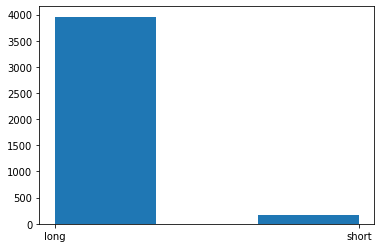

In [36]:
plt.hist(df1['bins'], bins=3)

In [37]:
df1.pdays.describe()

count    4119.000000
mean      960.422190
std       191.922786
min         0.000000
25%       999.000000
50%       999.000000
75%       999.000000
max       999.000000
Name: pdays, dtype: float64

In [38]:
bins = np.linspace(df.duration.min(),df.duration.max(),4)
bins

array([   0.        , 1214.33333333, 2428.66666667, 3643.        ])

Pandas has calculated the following cutoffs: 
Group 1: 0.00000 to 1214.33333333
Group 2: 1214.33333333 to 2428.666666667 
Group 3: 2428.666666667 to 3643.00000000 
Now we define the three labels (short, medium, long) for these three groups:

In [39]:
labels = ['short', 'medium', 'long']

In [40]:
df2=df
df2['bins'] = pd.cut(df2['duration'], bins=bins, labels=labels, include_lowest=True)

In [41]:
df2.groupby(['bins']).count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,loan_num,default_num
bins,,,,,,,,,,,,,,,,,,,,,,,
short,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076
medium,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
long,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


(array([4.076e+03, 4.000e+01, 3.000e+00]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <a list of 3 Patch objects>)

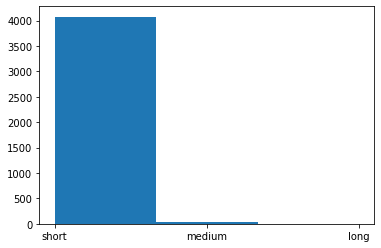

In [42]:
plt.hist(df2['bins'], bins=3)

In [44]:
df2.duration.describe()

count    4119.000000
mean      256.788055
std       254.703736
min         0.000000
25%       103.000000
50%       181.000000
75%       317.000000
max      3643.000000
Name: duration, dtype: float64

This will provide analysis later to show that a overwhelming majority of the answers in the data file for duration and pdays are the same values. Duration is the last contact with the person in seconds while pdays is the number of days that passed by after the client was last contacted from a previous campaign. These variables are ones with larger numeric values and by analyzing them we can basically see that the values for that column are not unique hardly and therefore could maybe be recoded for future use or taken slightly less. 

## QUESTION 4

Out of all of the bank customers does the number of days that passed by after the client was last contacted from a previous campaign, lead to a client subscribing to a term deposit? 


Is it important to try and get the duration time short for customers in order to get a client to subscribe to a term deposit?